<h1 style='color:DarkBlue' align='center'> Mercedes-Benz Greener competetion

**In this project our job is to predict how long a car on a production line will take to pass the testing phase.**
* Dataset contains masked features which are representing various tests and each row represents a seperate car
* target column is y which represents the time taken by car to pass test in seconds


In [1]:
#Lets import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
#reading the dataset
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


we have 4208 rows and 378 columns with  1 float , 369 int and 8 object(categorical) values

In [4]:
#data the has lots of features so setting options to view all columns
pd.options.display.max_columns = 400

In [5]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

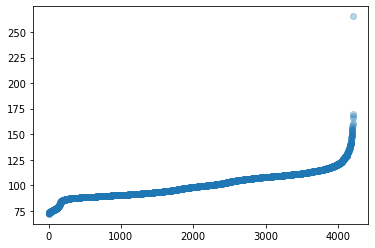

In [6]:
#checking the target variable 
plt.scatter(range(len(df)), np.sort(df.y.values), alpha=0.3)

In [7]:
#time at 250 eventough it is a valid datapoint but it is far away from rest datapoints so we will remove it treating it as an outlier in target column
#if not so, then it will affect our regression analysis.
df=df[df.y<225]

**find zero variance features is by calculating variance of features so that we can drop the features that contains zero variance**

In [8]:
feature_data_var_df = pd.DataFrame(df.var(axis=0))
feature_data_var_df[feature_data_var_df[0]==0]

,0
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [9]:
#lest define the list of columns to drop
cols_to_drop=pd.Series.tolist(feature_data_var_df[feature_data_var_df[0]==0].index)

In [10]:
#lets drop the columns not required from drop list
df=df.drop(cols_to_drop,axis=1)
print(df.shape)

(4208, 366)


In [12]:
from pycaret.regression import *

In [13]:
reg = setup(data=df, target = 'y', session_id=1975, normalize=True,  pca=True,
    pca_method='linear', pca_components=0.90,remove_outliers=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1975
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4208, 366)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,364
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models(blacklist = ['huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,5.7143,71.2001,8.4045,0.5424,0.0769,0.0547
1,Ridge Regression,5.7417,71.6836,8.4327,0.5393,0.0772,0.0549
2,Linear Regression,5.7432,71.7106,8.4342,0.5391,0.0772,0.0549
3,Least Angle Regression,5.7432,71.7106,8.4342,0.5391,0.0772,0.0549
4,Extreme Gradient Boosting,5.8625,73.5895,8.5488,0.5258,0.0785,0.0564
5,TheilSen Regressor,5.8985,74.4251,8.5957,0.5217,0.079,0.0566
6,CatBoost Regressor,5.8561,74.4781,8.5938,0.5213,0.0788,0.0562
7,Random Sample Consensus,5.3822,74.6843,8.606,0.5201,0.0784,0.0503
8,Gradient Boosting Regressor,5.9015,74.8445,8.623,0.5182,0.0792,0.0569
9,Support Vector Machine,5.5513,77.1354,8.75,0.5044,0.0797,0.0523


In [18]:
tuned_model=tune_model('br', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2374,105.2765,10.2604,0.4609,0.0903,0.0580
1,5.6020,59.3004,7.7007,0.5781,0.0721,0.0539
2,5.6311,75.0773,8.6647,0.5284,0.0792,0.0537
3,6.0635,69.4475,8.3335,0.5269,0.0782,0.0587
4,5.8269,68.7155,8.2895,0.4417,0.0778,0.0559
5,5.5886,66.5856,8.1600,0.5873,0.0737,0.0529
6,5.4654,71.4942,8.4554,0.5496,0.0761,0.0522
7,4.9737,52.8266,7.2682,0.6575,0.0660,0.0479
8,5.8042,77.6487,8.8119,0.5178,0.0804,0.0556
9,5.9500,65.6235,8.1008,0.5760,0.0755,0.0580


In [19]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,5.4377,58.4384,7.6445,0.5736,0.0709,0.0528


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_81,Component_82,Component_83,Component_84,Component_85,Component_86,Component_87,Component_88,y,Label
0,-2.757485,0.153951,0.816195,-0.295667,-1.654938,-0.909818,0.985201,0.038865,-0.773813,-0.428397,...,-0.224829,0.200432,-0.233701,0.124963,-0.150306,0.253883,-0.263738,0.104943,91.02,94.6505
1,-0.060552,-0.822603,2.368086,-0.898630,-1.186569,-0.155832,0.356978,-0.904040,-0.331036,0.208804,...,0.244464,-0.127262,0.108954,0.053968,-0.569532,-0.107609,-0.053726,0.287221,98.04,95.7067
2,1.304862,0.949261,0.647493,0.624600,-0.498525,-0.983419,-0.657370,0.293687,-0.164184,-1.178578,...,0.045356,-0.154687,-0.270430,0.590499,0.200746,-0.015510,-0.096196,-0.007021,110.47,117.3418
3,-0.877756,-0.862633,-1.635730,1.702113,-1.341543,-0.164786,1.235044,-0.093175,0.152881,-0.756278,...,0.084664,-0.066118,-0.298800,-0.167415,-0.203824,0.117541,0.101021,0.469847,94.71,105.3867
4,-2.562241,0.634516,0.233731,-0.056328,-0.367595,-1.013694,0.798804,-0.205027,-1.065482,0.340212,...,0.055713,-0.246295,-0.048722,-0.060731,0.032889,-0.075199,0.057728,-0.015832,90.49,90.9834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.062569,-0.533038,-1.869012,0.346150,-0.081931,0.827558,-0.323578,-0.632047,1.390348,-1.755895,...,0.083039,-0.111731,0.088209,0.159758,0.029518,-0.192031,0.017504,-0.055279,109.47,109.5534
1196,1.876894,-2.517968,0.163396,-0.789220,-1.443297,0.360372,0.275327,0.513724,0.178929,0.618123,...,0.171199,0.066916,0.018564,-0.119614,0.323860,0.008390,-0.001058,-0.131908,111.75,107.9993
1197,1.501042,-1.988100,0.498558,-0.615300,-1.371942,0.371896,-0.488097,0.030529,-0.076336,0.308848,...,0.350202,-0.109295,-0.138648,-0.473003,0.127486,0.190307,0.124539,-0.295446,108.28,109.2641
1198,-0.072576,-1.134510,2.192004,0.431135,0.365622,1.244748,0.171852,-0.415711,0.096945,-0.557580,...,-0.232589,-0.256350,-0.002366,-0.014360,-0.193294,0.256818,-0.232596,0.082811,110.94,111.2084


In [23]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
final_model=finalize_model(tuned_model)

In [25]:
p=predict_model(final_model,data=test)
p.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,Label
0,1,az,v,n,f,d,t,a,w,0,...,0,0,1,0,0,0,0,0,0,79.8368
1,2,t,b,ai,a,d,b,g,y,0,...,0,1,0,0,0,0,0,0,0,94.8865
2,3,az,v,as,f,d,a,j,j,0,...,0,0,1,0,0,0,0,0,0,82.8499
3,4,az,l,n,f,d,z,l,n,0,...,0,0,1,0,0,0,0,0,0,78.4251
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,0,0,0,0,0,111.1623


In [28]:
submission=p[['ID','Label']]

In [31]:
submission.rename(columns={'Label':'y'},inplace=True)

In [32]:
submission.to_csv('mercedes_submission.csv')